<a href="https://colab.research.google.com/github/PeddapalliAbhinav/2403A51L38_52/blob/main/Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# --------------------------
# Load dataset
# --------------------------
data = pd.read_csv("/content/GlobalLandTemperaturesByState.csv")
df = pd.DataFrame(data)

# Handle missing values
df = df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])

# Target variable (binary classification: Hot if temp > 20, else Cold)
df['TempLabel'] = np.where(df['AverageTemperature'] > 20, 1, 0)

# Features and target
X = df[['AverageTemperatureUncertainty']].values
y = df['TempLabel'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Utility function
def evaluate_model(model, model_name, cmap):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification report
    print(f"\n{model_name} - Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    # Numeric Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{model_name} - Confusion Matrix (numeric):\n", cm)

    # Graphical Confusion Matrix
    plt.figure(figsize=(5,5))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Cold","Hot"], cmap=cmap)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # Output graphical representation
    plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="True Labels")
    plt.scatter(X_test, y_pred, color="red", marker="x", label="Predicted Labels")
    plt.xlabel("Temperature Uncertainty")
    plt.ylabel("Hot (1) / Cold (0)")
    plt.title(f"{model_name} - Predictions")
    plt.legend()
    plt.show()



Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86    140036
           1       0.00      0.00      0.00     45973

    accuracy                           0.75    186009
   macro avg       0.38      0.50      0.43    186009
weighted avg       0.57      0.75      0.65    186009

Logistic Regression - Confusion Matrix (numeric):
 [[140036      0]
 [ 45973      0]]


<Figure size 500x500 with 0 Axes>

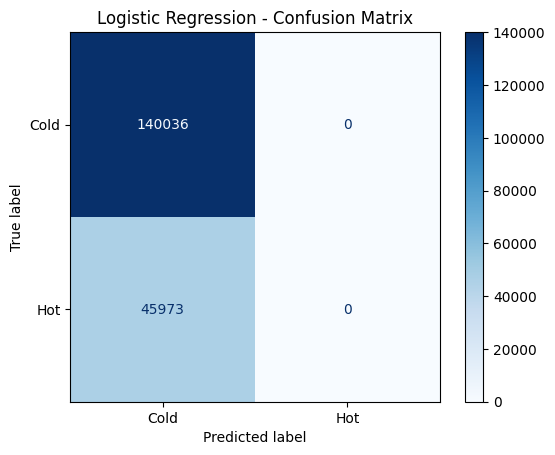

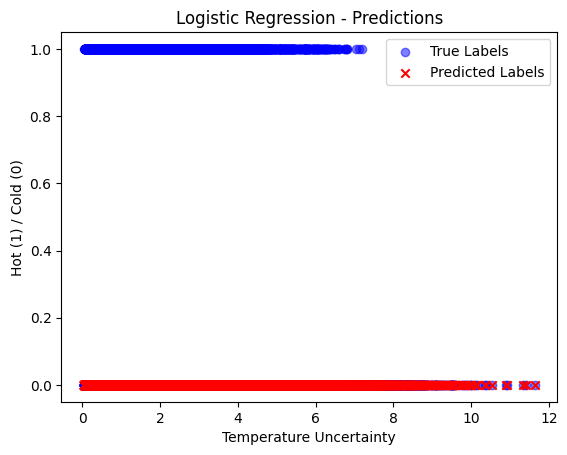

In [11]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
evaluate_model(LogisticRegression(max_iter=500, random_state=42), "Logistic Regression", plt.cm.Blues)



Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86    140036
           1       0.02      0.00      0.00     45973

    accuracy                           0.75    186009
   macro avg       0.39      0.50      0.43    186009
weighted avg       0.57      0.75      0.65    186009

Decision Tree - Confusion Matrix (numeric):
 [[139988     48]
 [ 45972      1]]


<Figure size 500x500 with 0 Axes>

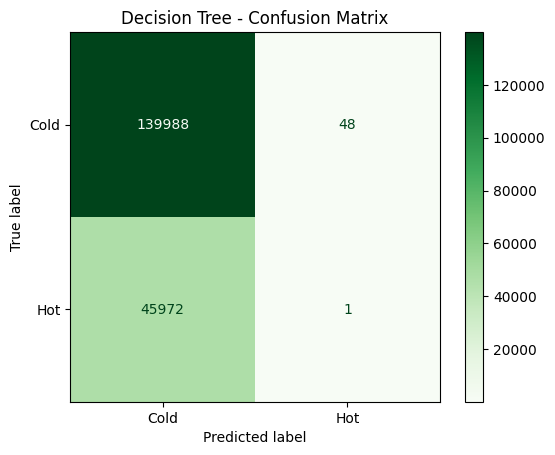

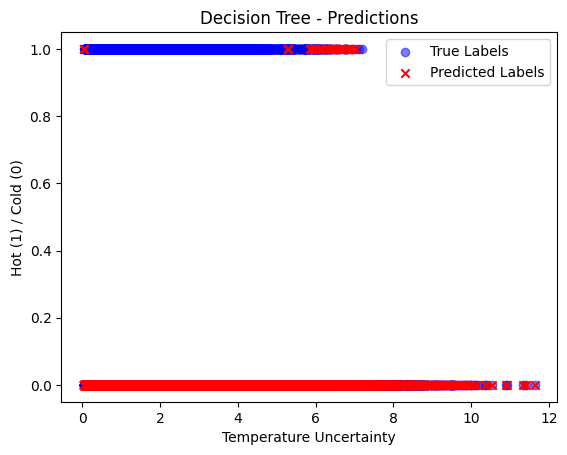

In [10]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
evaluate_model(DecisionTreeClassifier(random_state=42), "Decision Tree", plt.cm.Greens)



Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86    140036
           1       0.03      0.00      0.00     45973

    accuracy                           0.75    186009
   macro avg       0.39      0.50      0.43    186009
weighted avg       0.57      0.75      0.65    186009

Random Forest - Confusion Matrix (numeric):
 [[139969     67]
 [ 45971      2]]


<Figure size 500x500 with 0 Axes>

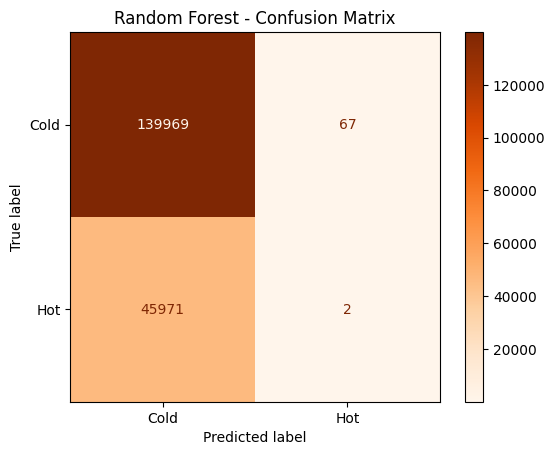

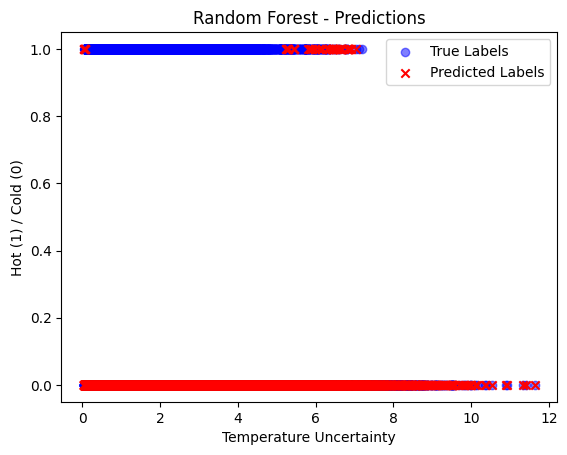

In [9]:
# Random forest

from sklearn.ensemble import RandomForestClassifier
evaluate_model(RandomForestClassifier(random_state=42), "Random Forest", plt.cm.Oranges)



K-Nearest Neighbors - Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82    140036
           1       0.29      0.12      0.17     45973

    accuracy                           0.71    186009
   macro avg       0.52      0.51      0.50    186009
weighted avg       0.64      0.71      0.66    186009

K-Nearest Neighbors - Confusion Matrix (numeric):
 [[126137  13899]
 [ 40373   5600]]


<Figure size 500x500 with 0 Axes>

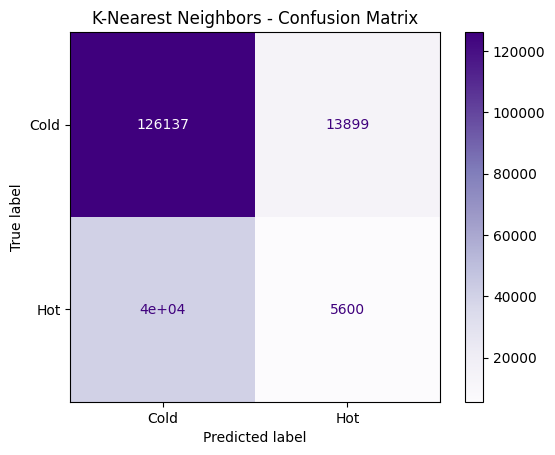

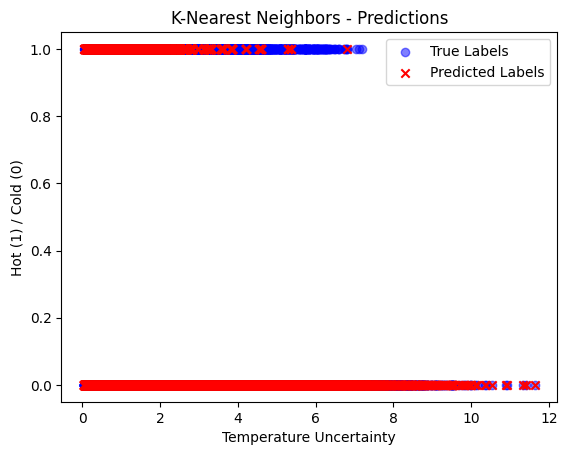

In [8]:
# K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier
evaluate_model(KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors", plt.cm.Purples)



Naive Bayes - Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86    140036
           1       0.00      0.00      0.00     45973

    accuracy                           0.75    186009
   macro avg       0.38      0.50      0.43    186009
weighted avg       0.57      0.75      0.65    186009

Naive Bayes - Confusion Matrix (numeric):
 [[140036      0]
 [ 45973      0]]


<Figure size 500x500 with 0 Axes>

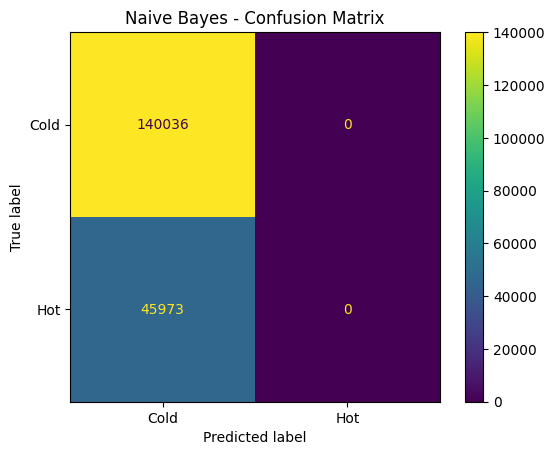

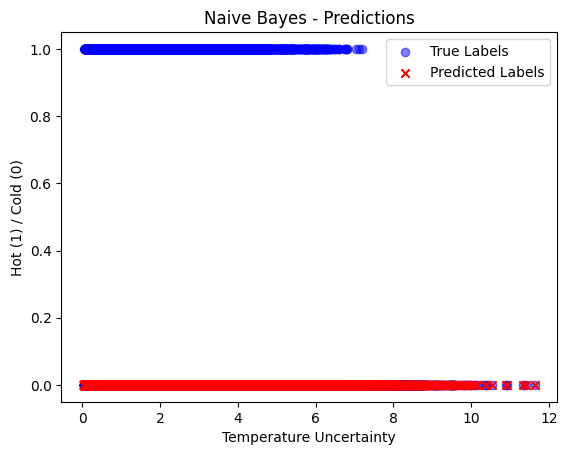

In [7]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
evaluate_model(GaussianNB(), "Naive Bayes", plt.cm.viridis)



Bagging Classifier - Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86    140036
           1       0.03      0.00      0.00     45973

    accuracy                           0.75    186009
   macro avg       0.39      0.50      0.43    186009
weighted avg       0.57      0.75      0.65    186009

Bagging Classifier - Confusion Matrix (numeric):
 [[139970     66]
 [ 45971      2]]


<Figure size 500x500 with 0 Axes>

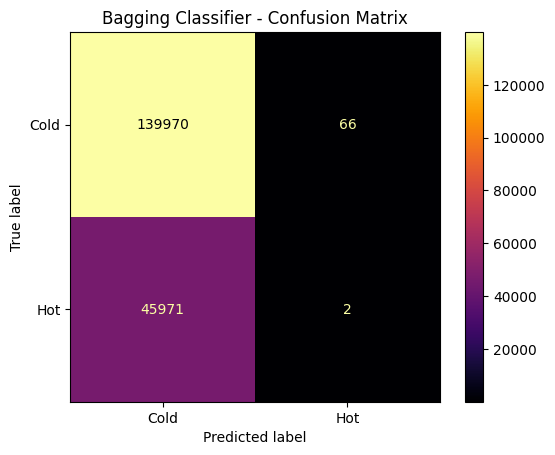

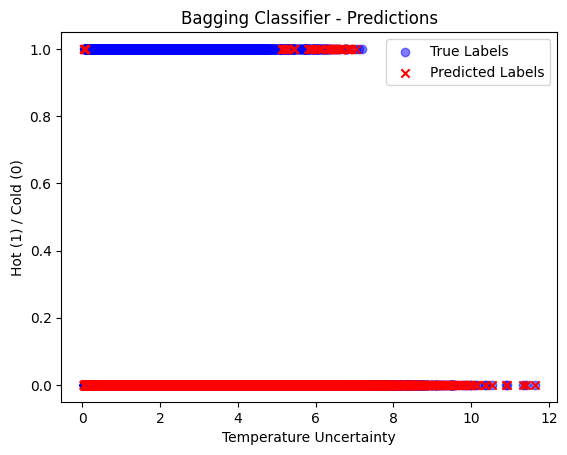

In [6]:
# Bagging Classifier

from sklearn.ensemble import BaggingClassifier
evaluate_model(BaggingClassifier(random_state=42), "Bagging Classifier", plt.cm.inferno)


Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86    140036
           1       0.00      0.00      0.00     45973

    accuracy                           0.75    186009
   macro avg       0.38      0.50      0.43    186009
weighted avg       0.57      0.75      0.65    186009

Gradient Boosting - Confusion Matrix (numeric):
 [[140033      3]
 [ 45973      0]]


<Figure size 500x500 with 0 Axes>

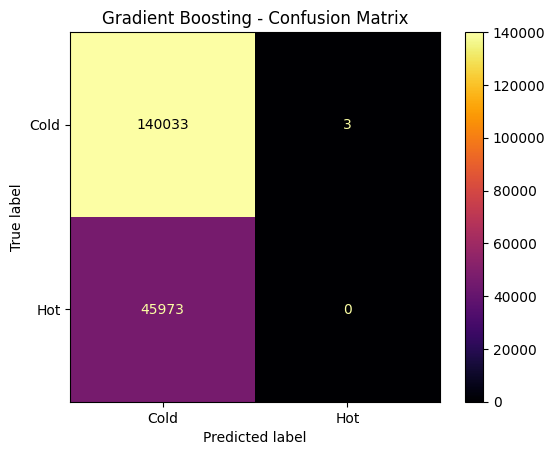

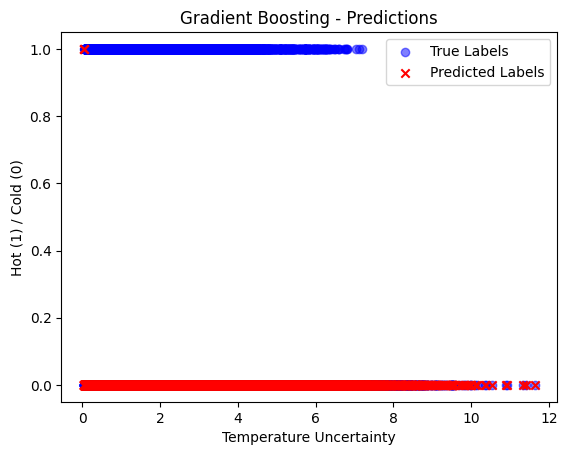

In [2]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
evaluate_model(GradientBoostingClassifier(random_state=42), "Gradient Boosting", plt.cm.inferno)



AdaBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86    140036
           1       0.00      0.00      0.00     45973

    accuracy                           0.75    186009
   macro avg       0.38      0.50      0.43    186009
weighted avg       0.57      0.75      0.65    186009

AdaBoost - Confusion Matrix (numeric):
 [[140036      0]
 [ 45973      0]]


<Figure size 500x500 with 0 Axes>

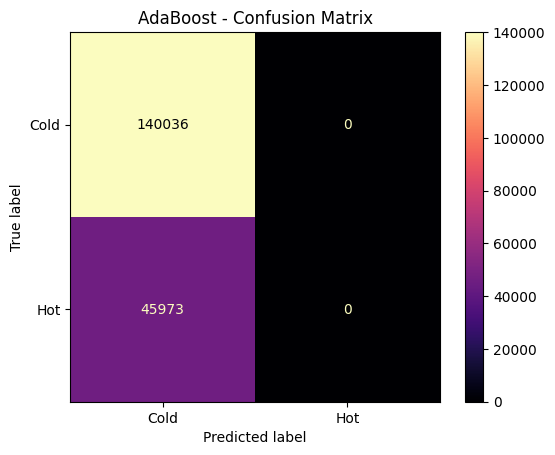

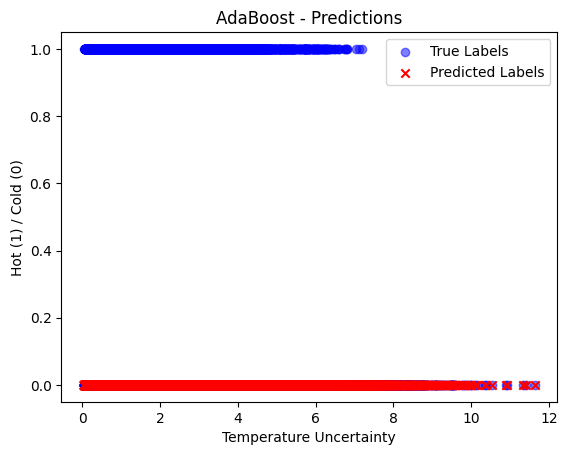

In [3]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier
evaluate_model(AdaBoostClassifier(random_state=42), "AdaBoost", plt.cm.magma)



Extra Trees Classifier - Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86    140036
           1       0.02      0.00      0.00     45973

    accuracy                           0.75    186009
   macro avg       0.39      0.50      0.43    186009
weighted avg       0.57      0.75      0.65    186009

Extra Trees Classifier - Confusion Matrix (numeric):
 [[139986     50]
 [ 45972      1]]


<Figure size 500x500 with 0 Axes>

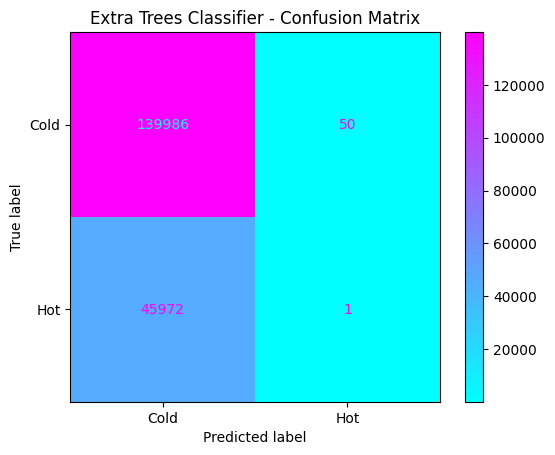

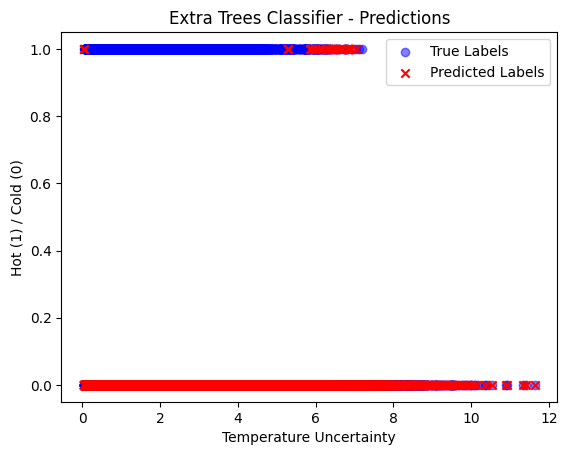

In [4]:
# Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier
evaluate_model(ExtraTreesClassifier(random_state=42), "Extra Trees Classifier", plt.cm.cool)



Neural Network (MLP) - Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86    140036
           1       0.00      0.00      0.00     45973

    accuracy                           0.75    186009
   macro avg       0.38      0.50      0.43    186009
weighted avg       0.57      0.75      0.65    186009

Neural Network (MLP) - Confusion Matrix (numeric):
 [[140036      0]
 [ 45973      0]]


<Figure size 500x500 with 0 Axes>

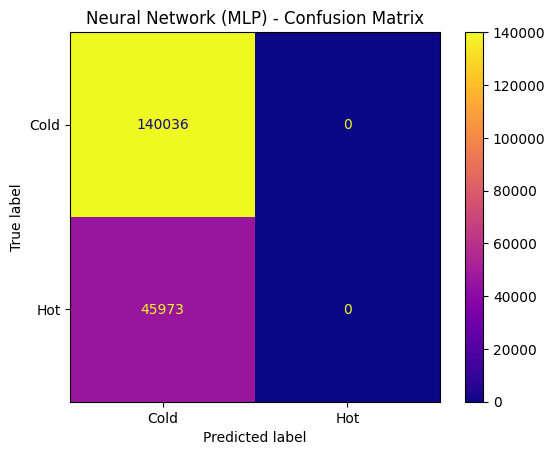

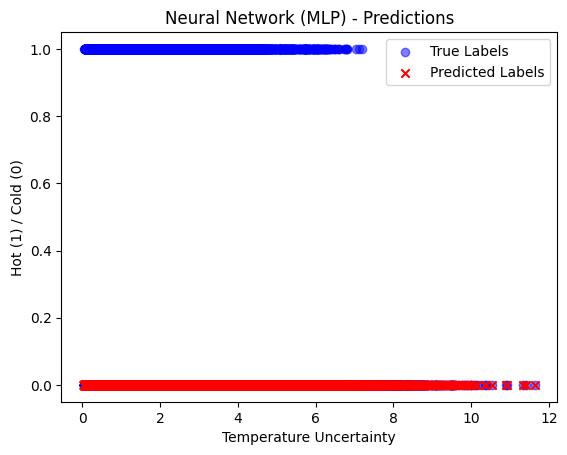

In [5]:
# Neural Network (MLPClassifier)

from sklearn.neural_network import MLPClassifier
evaluate_model(MLPClassifier(hidden_layer_sizes=(50,30), max_iter=500, random_state=42),
               "Neural Network (MLP)", plt.cm.plasma)



=== Model Comparison ===

                            Model  Accuracy  Precision    Recall  F1-Score
0             Logistic Regression  0.752845   0.000000  0.000000  0.000000
1                   Decision Tree  0.752593   0.020408  0.000022  0.000043
2                   Random Forest  0.752496   0.028986  0.000044  0.000087
3             K-Nearest Neighbors  0.708229   0.287194  0.121811  0.171065
4                     Naive Bayes  0.752845   0.000000  0.000000  0.000000
5              Bagging Classifier  0.752501   0.029412  0.000044  0.000087
6               Gradient Boosting  0.752829   0.000000  0.000000  0.000000
7                        AdaBoost  0.752845   0.000000  0.000000  0.000000
8  Neural Network (MLPClassifier)  0.752845   0.000000  0.000000  0.000000
9          Extra Trees Classifier  0.752582   0.019608  0.000022  0.000043


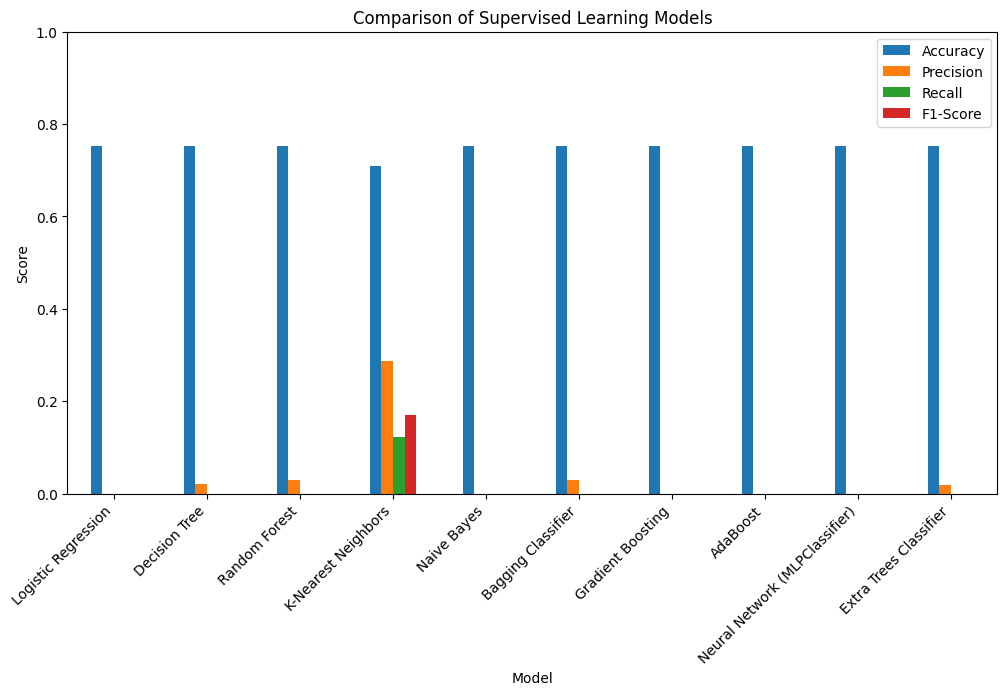

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store results
results = []

def evaluate_and_collect(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append([name, acc, prec, rec, f1])

# 1. Logistic Regression
evaluate_and_collect(LogisticRegression(max_iter=500, random_state=42), "Logistic Regression")

# 2. Decision Tree
evaluate_and_collect(DecisionTreeClassifier(random_state=42), "Decision Tree")

# 3. Random Forest
evaluate_and_collect(RandomForestClassifier(random_state=42), "Random Forest")

# 4. KNN
evaluate_and_collect(KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors")

# 5. Naive Bayes
evaluate_and_collect(GaussianNB(), "Naive Bayes")

# 6. Bagging Classifier
evaluate_and_collect(BaggingClassifier(random_state=42), "Bagging Classifier")

# 7. Gradient Boosting
evaluate_and_collect(GradientBoostingClassifier(random_state=42), "Gradient Boosting")

# 8. AdaBoost
evaluate_and_collect(AdaBoostClassifier(random_state=42), "AdaBoost")

# 9. Neural Network (MLPClassifier)
evaluate_and_collect(MLPClassifier(hidden_layer_sizes=(50,30), max_iter=500, random_state=42),
                     "Neural Network (MLPClassifier)")

# 10. Extra Trees Classifier
evaluate_and_collect(ExtraTreesClassifier(random_state=42), "Extra Trees Classifier")


# Convert to DataFrame for comparison
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\n=== Model Comparison ===\n")
print(results_df)

# Plot comparison
results_df.set_index("Model")[["Accuracy","Precision","Recall","F1-Score"]].plot(kind="bar", figsize=(12,6))
plt.title("Comparison of Supervised Learning Models")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45, ha="right")
plt.show()
